In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
base_dir = '../data'

train_dir = os.path.join(base_dir, 'train')
train_benign_dir = os.path.join(train_dir, 'benign')
train_malig_dir = os.path.join(train_dir, 'malignant')

test_dir = os.path.join(base_dir, 'test')
test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [4]:
image_dim = 100  # change as needed

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(image_dim, image_dim, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

2023-10-25 17:30:17.279863: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(image_dim, image_dim))

test_datagen  = ImageDataGenerator(rescale = 1.0/255)
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(image_dim, image_dim))

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [1]:
history = model.fit(
            train_generator, # pass in the training generator
            steps_per_epoch=40,
            epochs=50,
            validation_data=test_generator, # pass in the validation generator
            validation_steps=20,
            verbose=1
            )

NameError: name 'model' is not defined

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Loss in training and validation')

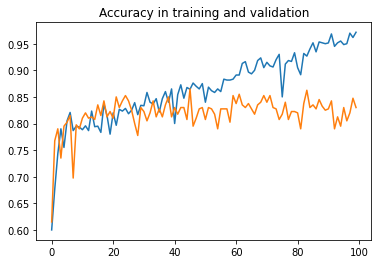

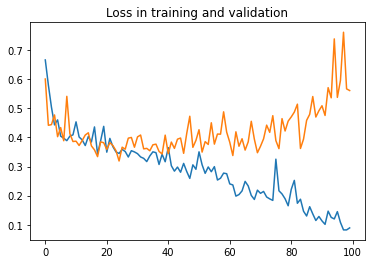

In [89]:
# get the metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [90]:
# Filepath must end in '/' and contain benign and malignant directories
# Returns a list of n tuples, [(filename, correct_label)...]
# Possible tweak: change filepath instead of returning error?
def random_images(filepath, n):  
    if filepath[-1] != '/':
        print("ERROR: Filepath does not end in '/'.")
        return
    benign_n = random.randint(0, n)
    malig_n = n - benign_n
    benign_dir, malig_dir = os.listdir(filepath + "benign/"), os.listdir(filepath + "malignant/")
    benign_files, malig_files = random.sample(benign_dir, benign_n), random.sample(malig_dir, malig_n)
    output = [("benign/" + filename, "benign") for filename in benign_files]
    output += [("malignant/" + filename, "malignant") for filename in malig_files]
    random.shuffle(output)
    return output
    

In [91]:
filepath = "../data/test/"
class_labels = ['benign', 'malignant']
n = 200
total_ct = 0
accurate_ct = 0.0

images = random_images(filepath, n)

for file_tuple in images:
    filename, correct_label = file_tuple[0], file_tuple[1]
    img_path = os.path.join(filepath, filename)
    img = image.load_img(img_path, target_size=(image_dim, image_dim))
    x = image.img_to_array(img) / 255 
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10, verbose=0)
    prediction = ""
    if classes[0] < 0.5:
        prediction = "benign"
    else:
        prediction = "malignant"

    if prediction == correct_label:
        accurate_ct += 1

    print("Image " + str(total_ct) + ": Predicted " + prediction + ", is actually " + correct_label)
    total_ct += 1

print("Rate of accuracy:", accurate_ct / n)


Image 0: Predicted benign, is actually benign
Image 1: Predicted benign, is actually benign
Image 2: Predicted malignant, is actually malignant
Image 3: Predicted malignant, is actually malignant
Image 4: Predicted benign, is actually malignant
Image 5: Predicted benign, is actually benign
Image 6: Predicted benign, is actually benign
Image 7: Predicted malignant, is actually benign
Image 8: Predicted benign, is actually benign
Image 9: Predicted benign, is actually benign
Image 10: Predicted benign, is actually benign
Image 11: Predicted benign, is actually benign
Image 12: Predicted benign, is actually benign
Image 13: Predicted benign, is actually benign
Image 14: Predicted malignant, is actually benign
Image 15: Predicted benign, is actually benign
Image 16: Predicted benign, is actually benign
Image 17: Predicted benign, is actually benign
Image 18: Predicted benign, is actually benign
Image 19: Predicted malignant, is actually malignant
Image 20: Predicted benign, is actually ben